# Subsetting data - FORCE 2020
The original data set (114 wells) can take a long time to process and develop a neural network. A subset based is generated to reduce the amount of computations while still providing an example dataset for the IFP_ML miniprojects. 

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
data = pd.read_csv('C:/Users/vesc/OneDrive - Equinor/Documents/01_IFP_ML/04_lithofacies_prediction/train.csv', sep=';')
data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0


Creating a subset of the data based on the geographic location.

In [3]:
subset_data = data[(data['Y_LOC'] < 6700000) & (data['Y_LOC'] > 6500000)]
subset_data
num_wells = subset_data['WELL'].nunique()
well_counts = subset_data['WELL'].value_counts()
print(well_counts)

25/2-7        25131
25/7-2        23879
25/4-5        23005
25/3-1        21186
25/2-13 T4    21062
26/4-1        19577
25/5-1        18473
25/2-14       15840
25/9-1        15743
25/8-5 S      14596
16/4-1        14082
25/5-4        12990
25/6-3        11985
16/2-11 A     10699
16/2-16       10025
16/2-6         9138
25/8-7         8644
25/11-19 S     6975
25/6-1         6209
25/11-5        5060
16/1-6 A       3623
16/5-3         3021
25/6-2         2925
25/11-15       2284
16/1-2         1734
Name: WELL, dtype: int64


Text(0, 0.5, 'Y_LOC')

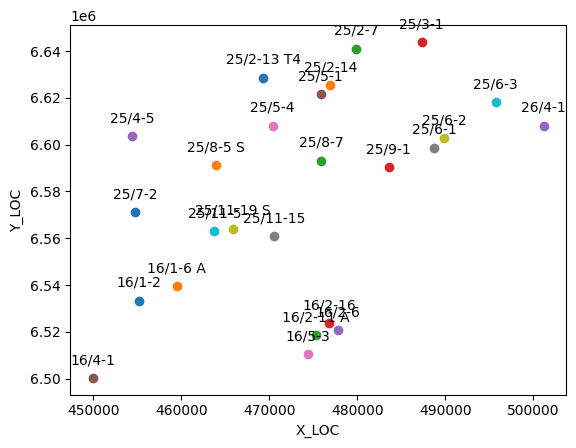

In [4]:
# Group the data by WELL and find the point with the minimum DEPTH
min_depth_points = subset_data.groupby('WELL').apply(lambda x: x.loc[x['DEPTH_MD'].idxmin()])

# Plot the X-Y location
for _, point in min_depth_points.iterrows():
    plt.scatter(point['X_LOC'], point['Y_LOC'], label=point['WELL'])
    plt.annotate(point['WELL'], (point['X_LOC'], point['Y_LOC']), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('X_LOC')
plt.ylabel('Y_LOC')

# min_depth_points = blind_data.groupby('WELL').apply(lambda x: x.loc[x['DEPTH_MD'].idxmin()])

# for _, point in min_depth_points.iterrows():
#     plt.scatter(point['X_LOC'], point['Y_LOC'], label=point['WELL'], c = 'k')
#     plt.annotate(point['WELL'], (point['X_LOC'], point['Y_LOC']), textcoords="offset points", xytext=(0,10), ha='center')

# plt.show()

In [5]:
#blind_wells = ['25/7-2', '25/8-7', '25/6-3']
blind_wells = subset_data['WELL'].sample(n=3, random_state=2)
blind_data = subset_data[subset_data['WELL'].isin(blind_wells)]

In [6]:
train_data = subset_data[~subset_data['WELL'].isin(blind_wells)]

In [7]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

C:\Users\vesc\AppData\Local\Temp\ipykernel_13852\3949142622.py:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in train_counts.iteritems():
C:\Users\vesc\AppData\Local\Temp\ipykernel_13852\3949142622.py:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in test_counts.iteritems():


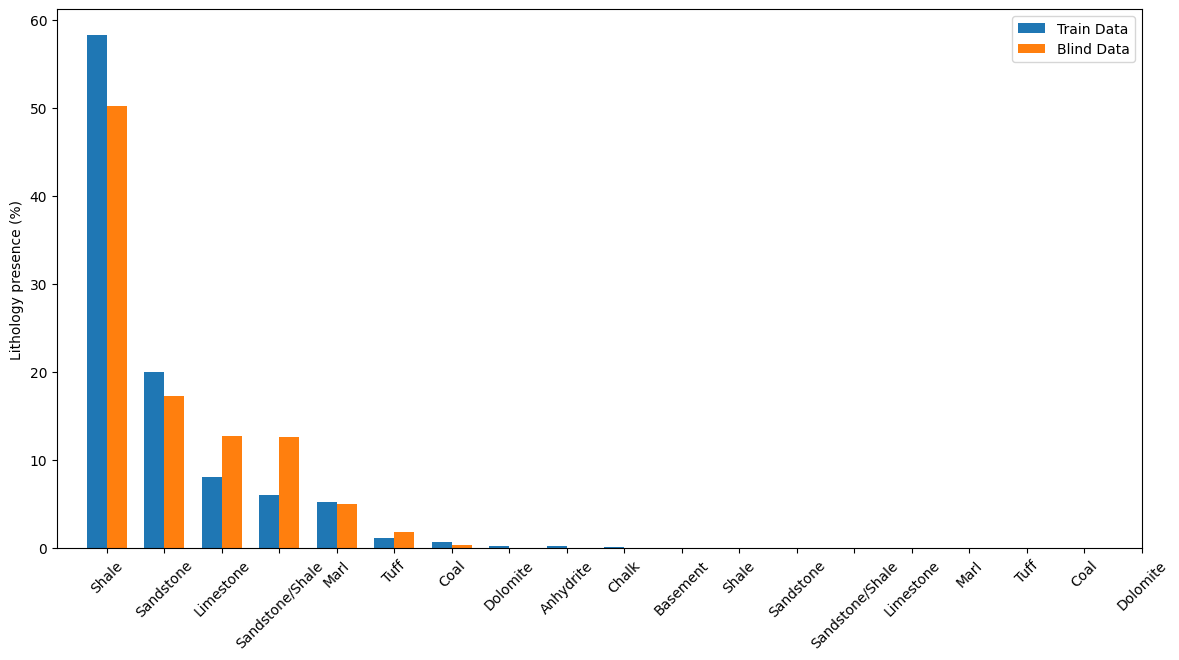

In [8]:
train_counts = train_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()
test_counts = blind_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

train_names = []
train_percentage = []
test_names = []
test_percentage = []

N_train = train_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]
N_test = blind_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]

for item in train_counts.iteritems():
    train_names.append(lithology_keys[item[0]])
    train_percentage.append(float(item[1])/N_train*100)

for item in test_counts.iteritems():
    test_names.append(lithology_keys[item[0]])
    test_percentage.append(float(item[1])/N_test*100)

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
width = 0.35  # width of the bars

ax.bar(x=np.arange(len(train_names)), height=train_percentage, width=width, label='Train Data')
ax.bar(x=np.arange(len(test_names)) + width, height=test_percentage, width=width, label='Blind Data')
ax.set_xticks(np.arange(len(train_names + test_names)) + width/2)
ax.set_xticklabels(train_names + test_names, rotation=45)
ax.set_ylabel('Lithology presence (%)')
ax.legend()


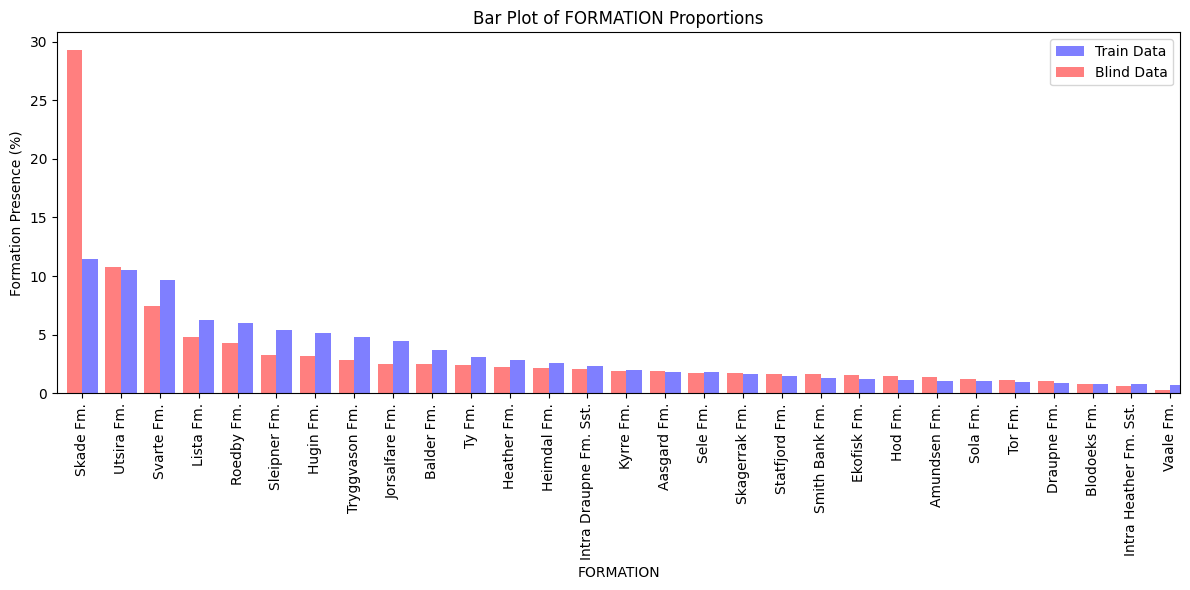

In [9]:
train_counts = train_data['FORMATION'].value_counts()
test_counts = blind_data['FORMATION'].value_counts()

train_proportions = train_counts / train_counts.sum()*100
test_proportions = test_counts / test_counts.sum()*100

fig, ax = plt.subplots(figsize=(12, 6))  # Increase the figure size

width = 0.4  # Adjust the width of the bars
train_proportions.plot(kind='bar', color='blue', alpha=0.5, label='Train Data', position=0, width=width)
test_proportions.plot(kind='bar', color='red', alpha=0.5, label='Blind Data', position=1, width=width)

ax.set_xlabel('FORMATION')
ax.set_ylabel('Formation Presence (%)')
ax.set_title('Bar Plot of FORMATION Proportions')
ax.legend()

plt.tight_layout()  # Add space between the bins

plt.show()

In [10]:
train_data.to_csv('C:/Appl/python_libraries/IFP_ML_Miniprojects/04_lithology_prediction/00_data/train_data.csv', index=False)
blind_data.to_csv('C:/Appl/python_libraries/IFP_ML_Miniprojects/04_lithology_prediction/00_data/blind_data.csv', index=False)
blind_data_no_facies = blind_data.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE'], axis=1)
blind_data_no_facies.to_csv('C:/Appl/python_libraries/IFP_ML_Miniprojects/04_lithology_prediction/00_data/blind_data_nofacies.csv', index=False)

In [11]:
train_data_missing = train_data.groupby('WELL').apply(lambda x: x.isnull().sum())
blind_data_missing = blind_data.groupby('WELL').apply(lambda x: x.isnull().sum())

print("Train Data Missing Values:")
print(train_data_missing)

print("\nBlind Data Missing Values:")
print(blind_data_missing)


Train Data Missing Values:
            WELL  DEPTH_MD  X_LOC  Y_LOC  Z_LOC  GROUP  FORMATION  CALI  \
WELL                                                                      
16/1-2         0         0      0      0      0      0          0     0   
16/1-6 A       0         0      0      0      0      0          0    10   
16/2-16        0         0      0      0      0      0        979     0   
16/2-6         0         0      0      0      0      0        618   170   
16/4-1         0         0      0      0      0      0          1     8   
16/5-3         0         0      0      0      0      0          0     0   
25/11-15       0         0      0      0      0      0          0     0   
25/11-19 S     0         0      0      0      0      0          0     0   
25/11-5        0         0      0      0      0      0          0     0   
25/2-13 T4     0         0      0      0      0      0          0     0   
25/2-14        0         0      0      0      0      0          0     0  

In [12]:
display(train_data_missing)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
WELL,,,,,,,,,,,,,,,,,,,,,
16/1-2,0,0,0,0,0,0,0,0,0,0,...,0,1734,1734,0,0,1734,1734,1734,0,0
16/1-6 A,0,0,0,0,0,0,0,10,3623,26,...,0,3623,3623,3623,0,3623,3623,3623,0,1
16/2-16,0,0,0,0,0,0,979,0,10025,28,...,23,6602,10025,207,10025,10025,10025,10025,0,2
16/2-6,0,0,0,0,0,0,618,170,9138,0,...,0,7250,9138,196,9138,9138,0,9138,0,0
16/4-1,0,0,0,0,0,0,1,8,1658,693,...,0,14082,0,0,0,14082,14082,9613,0,1
16/5-3,0,0,0,0,0,0,0,0,3021,5,...,0,0,3021,0,3021,18,0,3021,0,0
25/11-15,0,0,0,0,0,0,0,0,0,0,...,0,2284,2284,0,0,2284,2284,2284,0,0
25/11-19 S,0,0,0,0,0,0,0,0,0,0,...,27,6975,6975,106,103,6975,6975,6975,0,1
25/11-5,0,0,0,0,0,0,0,0,5060,0,...,32,5060,0,0,0,5060,5060,5060,0,1


In [14]:
train_data_missing[['RDEP','RHOB','GR','SGR','NPHI','PEF','DTC', 'SP', 'BS', 'ROP']]

,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP
WELL,,,,,,,,,,
16/1-2,0,95,0,1734,88,1734,0,0,0,0
16/1-6 A,0,144,0,3623,8,144,140,3623,0,0
16/2-16,0,342,0,10025,127,342,74,10025,0,23
16/2-6,0,315,0,9138,217,315,255,9138,0,0
16/4-1,0,9,0,14082,0,13260,10,0,8,0
16/5-3,0,18,0,3021,42,18,0,3021,0,0
25/11-15,0,0,0,2284,0,2284,0,0,0,0
25/11-19 S,0,0,0,6975,6,23,46,6975,6975,27
25/11-5,0,0,0,5060,0,5060,0,0,0,32


In [15]:

train_data_missing = train_data.groupby('WELL').apply(lambda x: x.isnull().sum() / len(x))
blind_data_missing = blind_data.groupby('WELL').apply(lambda x: x.isnull().sum() / len(x))

print("Train Data Missing Values (Proportion):")
print(train_data_missing)

print("\nBlind Data Missing Values (Proportion):")
print(blind_data_missing)


Train Data Missing Values (Proportion):
            WELL  DEPTH_MD  X_LOC  Y_LOC  Z_LOC  GROUP  FORMATION      CALI  \
WELL                                                                          
16/1-2       0.0       0.0    0.0    0.0    0.0    0.0   0.000000  0.000000   
16/1-6 A     0.0       0.0    0.0    0.0    0.0    0.0   0.000000  0.002760   
16/2-16      0.0       0.0    0.0    0.0    0.0    0.0   0.097656  0.000000   
16/2-6       0.0       0.0    0.0    0.0    0.0    0.0   0.067630  0.018604   
16/4-1       0.0       0.0    0.0    0.0    0.0    0.0   0.000071  0.000568   
16/5-3       0.0       0.0    0.0    0.0    0.0    0.0   0.000000  0.000000   
25/11-15     0.0       0.0    0.0    0.0    0.0    0.0   0.000000  0.000000   
25/11-19 S   0.0       0.0    0.0    0.0    0.0    0.0   0.000000  0.000000   
25/11-5      0.0       0.0    0.0    0.0    0.0    0.0   0.000000  0.000000   
25/2-13 T4   0.0       0.0    0.0    0.0    0.0    0.0   0.000000  0.000000   
25/2-14     

In [16]:
display(train_data_missing)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
WELL,,,,,,,,,,,,,,,,,,,,,
16/1-2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0,1.000000,0.0,0.000000
16/1-6 A,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.002760,1.000000,0.007176,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.0,1.000000,0.0,0.000276
16/2-16,0.0,0.0,0.0,0.0,0.0,0.0,0.097656,0.000000,1.000000,0.002793,...,0.002294,0.658554,1.000000,0.020648,1.000000,1.000000,1.0,1.000000,0.0,0.000200
16/2-6,0.0,0.0,0.0,0.0,0.0,0.0,0.067630,0.018604,1.000000,0.000000,...,0.000000,0.793390,1.000000,0.021449,1.000000,1.000000,0.0,1.000000,0.0,0.000000
16/4-1,0.0,0.0,0.0,0.0,0.0,0.0,0.000071,0.000568,0.117739,0.049212,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.682645,0.0,0.000071
16/5-3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.001655,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.005958,0.0,1.000000,0.0,0.000000
25/11-15,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0,1.000000,0.0,0.000000
25/11-19 S,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.003871,1.000000,1.000000,0.015197,0.014767,1.000000,1.0,1.000000,0.0,0.000143
25/11-5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,...,0.006324,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,0.0,0.000198


In [17]:
train_data_missing[['RDEP','RHOB','GR','SGR','NPHI','PEF','DTC', 'SP', 'BS', 'ROP']]

,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP
WELL,,,,,,,,,,
16/1-2,0.0,0.054787,0.0,1.0,0.050750,1.000000,0.000000,0.000000,0.000000,0.000000
16/1-6 A,0.0,0.039746,0.0,1.0,0.002208,0.039746,0.038642,1.000000,0.000000,0.000000
16/2-16,0.0,0.034115,0.0,1.0,0.012668,0.034115,0.007382,1.000000,0.000000,0.002294
16/2-6,0.0,0.034471,0.0,1.0,0.023747,0.034471,0.027905,1.000000,0.000000,0.000000
16/4-1,0.0,0.000639,0.0,1.0,0.000000,0.941628,0.000710,0.000000,0.000568,0.000000
16/5-3,0.0,0.005958,0.0,1.0,0.013903,0.005958,0.000000,1.000000,0.000000,0.000000
25/11-15,0.0,0.000000,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25/11-19 S,0.0,0.000000,0.0,1.0,0.000860,0.003297,0.006595,1.000000,1.000000,0.003871
25/11-5,0.0,0.000000,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.006324


In [19]:
blind_data_missing[['RDEP','RHOB','GR','SGR','NPHI','PEF','DTC', 'SP', 'BS', 'ROP']]

,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP
WELL,,,,,,,,,,
16/2-11 A,0.0,0.029162,0.0,1.000000,0.012525,0.029162,0.005234,1.000000,0.0,0.000000
25/7-2,0.0,0.004397,0.0,0.883705,0.739897,0.618703,0.002387,0.260941,0.0,0.000000
25/9-1,0.0,0.765928,0.0,1.000000,0.767770,0.765928,0.734866,0.633170,0.0,0.004383
